In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

from pathlib import Path
import sys

notebook_dir = Path().resolve()
common_utils_path = notebook_dir.parent / "common_utils"
sys.path.append(str(common_utils_path))

from EDA import dataset_overview,categorical_analysis,num_analysis


In [2]:
# Import Data

df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_final = pd.read_csv('sample_submission.csv')
df_additional_data = pd.read_csv('Fertilizer Prediction.csv')
df_additional_data['id'] = 0

df = pd.concat([df,df_additional_data])

# Dataset Overview

In [3]:
num_cols, cat_cols = dataset_overview(df)

==================================== Dataset Overview ====================================

============ Data Shape ============
Rows: 850000
Columns: 10


============ Datatypes ============
<class 'pandas.core.frame.DataFrame'>
Index: 850000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               850000 non-null  int64 
 1   Temparature      850000 non-null  int64 
 2   Humidity         850000 non-null  int64 
 3   Moisture         850000 non-null  int64 
 4   Soil Type        850000 non-null  object
 5   Crop Type        850000 non-null  object
 6   Nitrogen         850000 non-null  int64 
 7   Potassium        850000 non-null  int64 
 8   Phosphorous      850000 non-null  int64 
 9   Fertilizer Name  850000 non-null  object
dtypes: int64(7), object(3)
memory usage: 71.3+ MB
============ Missing Values ============


id                 0
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64



============ Duplicates Values ============
Duplicated values : 0
============ Data Preview ============
Head:


,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17


Tail:


,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
99997,0,28,50,61,Sandy,Maize,10,11,14,14-35-14
99998,0,29,57,63,Loamy,Ground Nuts,7,10,4,DAP
99999,0,25,72,42,Sandy,Wheat,38,2,6,17-17-17


Sample:


,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
219661,219661,29,56,63,Loamy,Paddy,42,5,27,17-17-17
393243,393243,27,69,34,Red,Pulses,20,18,29,14-35-14
152753,152753,26,72,30,Loamy,Tobacco,26,4,23,14-35-14




============ Numerical and Categorical Values ============
Numerical Datatypes: Index(['id', 'Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous'],
      dtype='object')
Number of numeric features: 7
Categorical Datatypes: Index(['Soil Type', 'Crop Type', 'Fertilizer Name'], dtype='object')
Number of categorical features: 3


# Observations:
1. There are 850000 rows of data, and 10 columns
2. There are no duplicated or null values
3. There is 1 id column, 6 numeric features, 2 categorical features and 1 categorical target 
4. Data shows the type of environment that specific crop types are grown in, and then the optimal fertilizer used 

# Numerical Analysis

In [4]:
print(num_cols)

Index(['id', 'Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous'],
      dtype='object')


In [5]:
cols_to_analyze = num_cols.drop('id')

****************************** Temparature analysis ******************************


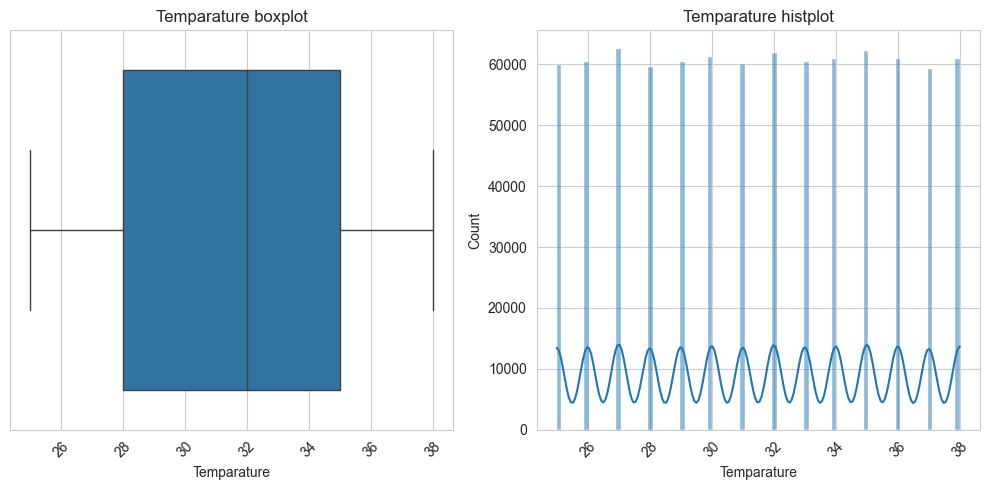

********************  Temparature values description  ********************


,Temparature
count,850000.000000
mean,31.503534
std,4.024909
min,25.000000
25%,28.000000
50%,32.000000
75%,35.000000
max,38.000000


********************  Temparature outliers  ********************
IQR : 7.0




****************************** Humidity analysis ******************************


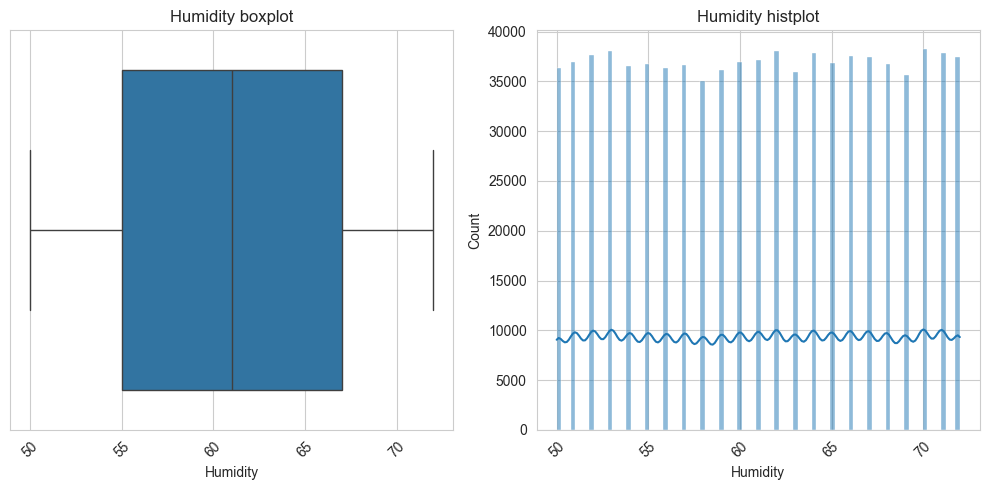

********************  Humidity values description  ********************


,Humidity
count,850000.000000
mean,61.032665
std,6.648149
min,50.000000
25%,55.000000
50%,61.000000
75%,67.000000
max,72.000000


********************  Humidity outliers  ********************
IQR : 12.0




****************************** Moisture analysis ******************************


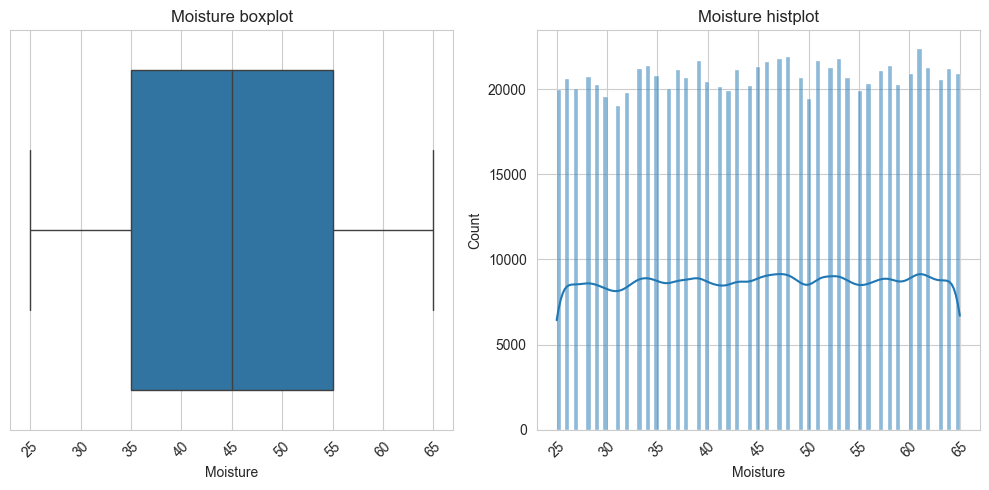

********************  Moisture values description  ********************


,Moisture
count,850000.000000
mean,45.162887
std,11.799929
min,25.000000
25%,35.000000
50%,45.000000
75%,55.000000
max,65.000000


********************  Moisture outliers  ********************
IQR : 20.0




****************************** Nitrogen analysis ******************************


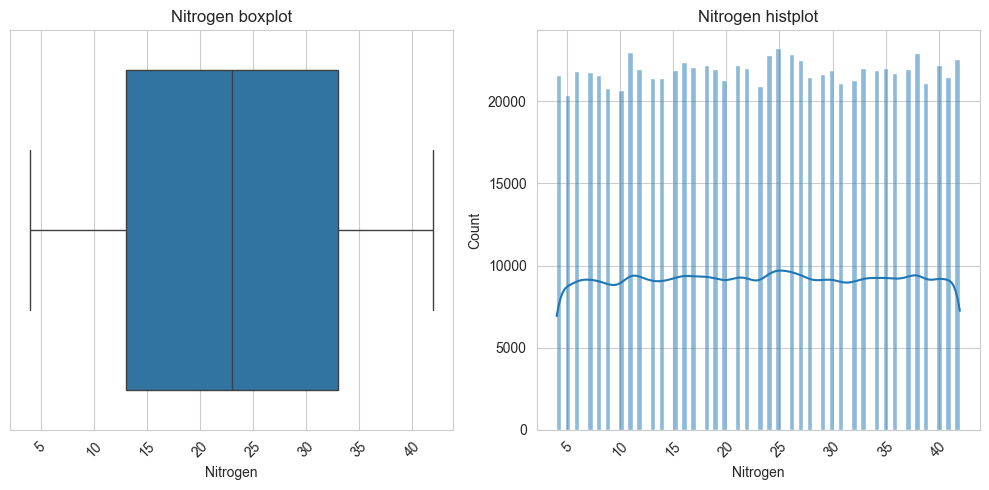

********************  Nitrogen values description  ********************


,Nitrogen
count,850000.000000
mean,23.081215
std,11.219842
min,4.000000
25%,13.000000
50%,23.000000
75%,33.000000
max,42.000000


********************  Nitrogen outliers  ********************
IQR : 20.0




****************************** Potassium analysis ******************************


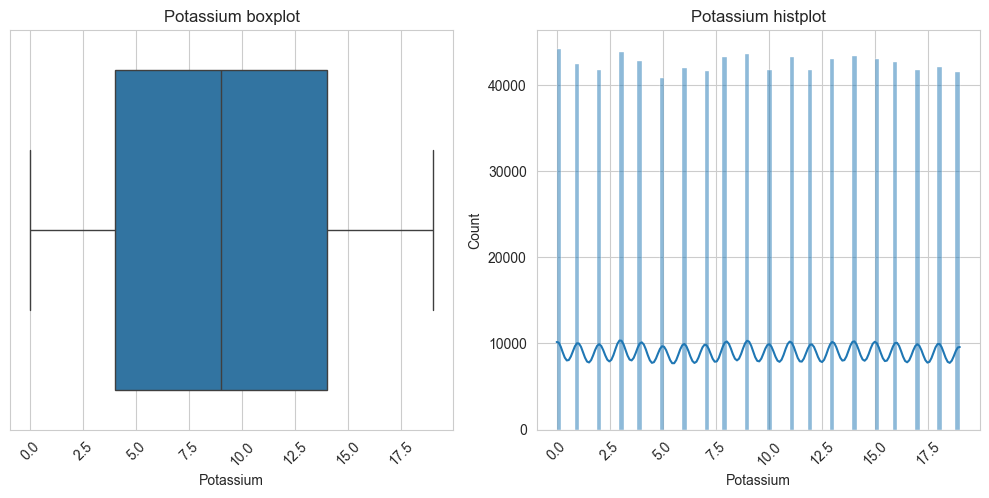

********************  Potassium values description  ********************


,Potassium
count,850000.000000
mean,9.477581
std,5.765965
min,0.000000
25%,4.000000
50%,9.000000
75%,14.000000
max,19.000000


********************  Potassium outliers  ********************
IQR : 10.0




****************************** Phosphorous analysis ******************************


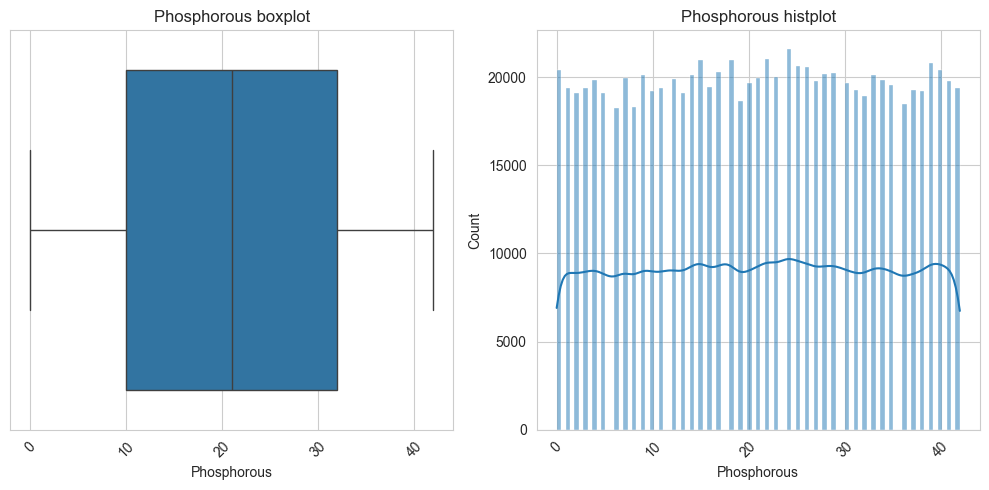

********************  Phosphorous values description  ********************


,Phosphorous
count,850000.000000
mean,21.066198
std,12.352064
min,0.000000
25%,10.000000
50%,21.000000
75%,32.000000
max,42.000000


********************  Phosphorous outliers  ********************
IQR : 22.0






In [6]:
for col in cols_to_analyze:
    num_analysis(df=df,col=col)

# Observations
1. All very uniform values, nothing particularly stands out

# Categorical Analysis

****************************** Soil Type analysis ******************************
Number of Unique Soil Type values: 5


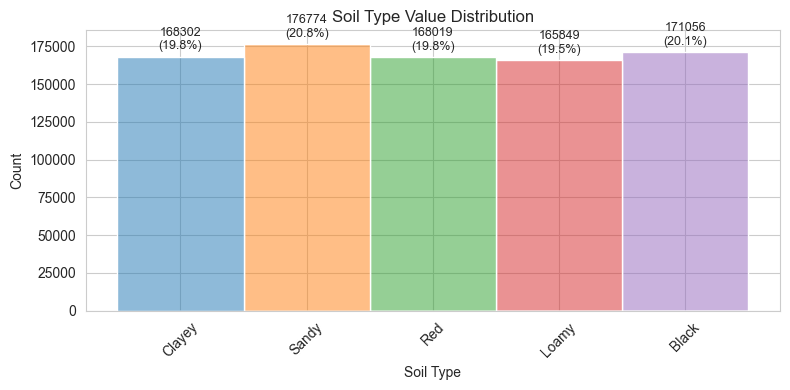





****************************** Crop Type analysis ******************************
Number of Unique Crop Type values: 11
Top values for Crop Type


,Crop Type,count
0,Paddy,94857
1,Pulses,87252
2,Cotton,78408
3,Tobacco,77224
4,Wheat,75540






****************************** Fertilizer Name analysis ******************************
Number of Unique Fertilizer Name values: 7


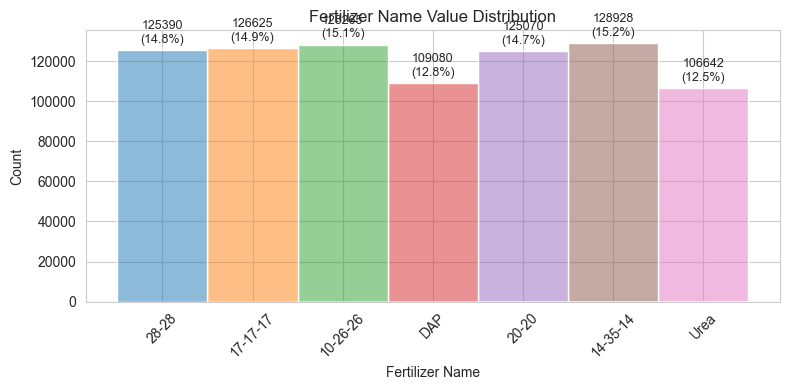

In [7]:
for col in cat_cols:
    categorical_analysis(df=df,col=col)

# Observations
1. Very uniform distribution
2. Values can likely be one hot encoded
3. Label encode the fertilizer

# Correlation Analysis

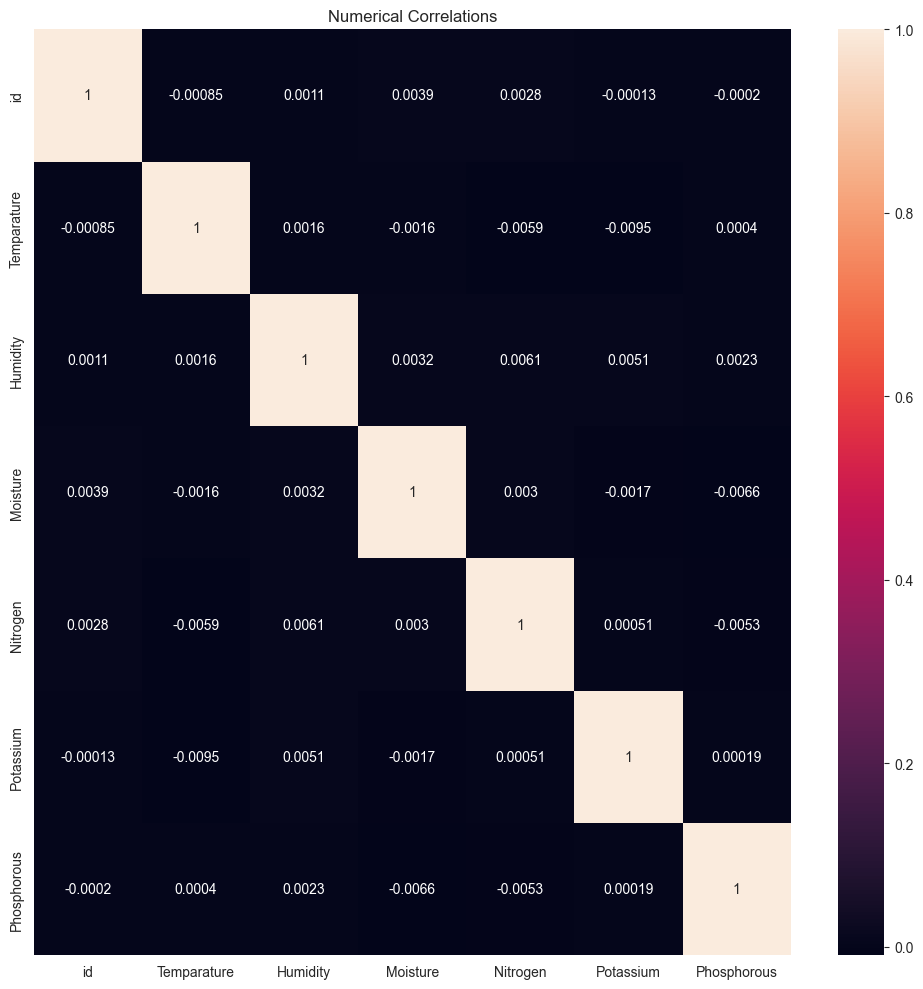

In [8]:
df_corr = df[num_cols].corr()
plt.figure(figsize=(10,10))
plt.title("Numerical Correlations")
sns.heatmap(df_corr,annot=True)
plt.tight_layout()
plt.show()


In [9]:
df.columns

Index(['id', 'Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [10]:
num_cols

Index(['id', 'Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous'],
      dtype='object')

# Observations
1. No highly correlated items, no risk of multicollinearity

# Business Related Analysis


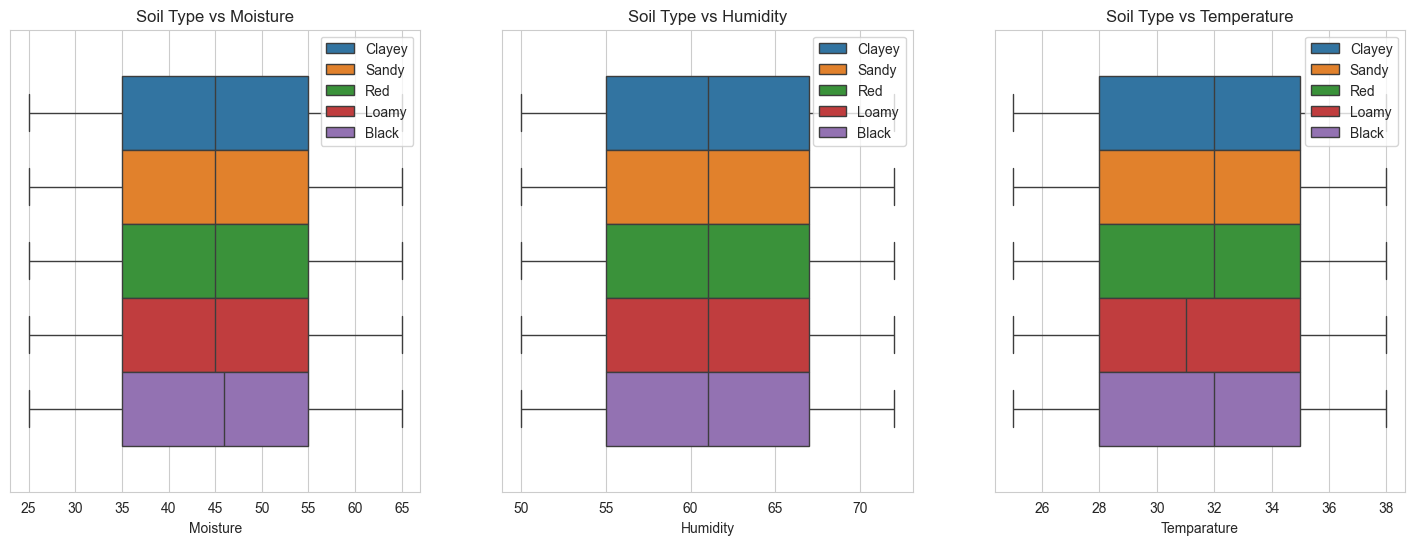

In [11]:
# What is the relationship between the type of soil, and the recorded temperature, humidity and moisture?

fig,axs = plt.subplots(ncols=3,nrows=1,figsize=(18,6))
axs[0].set_title("Soil Type vs Moisture")
sns.boxplot(data=df,x='Moisture',hue='Soil Type',ax=axs[0])
axs[1].set_title("Soil Type vs Humidity")
sns.boxplot(data=df,x='Humidity',hue='Soil Type',ax=axs[1])
axs[2].set_title("Soil Type vs Temperature")
sns.boxplot(data=df,x='Temparature',hue='Soil Type',ax=axs[2])

axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')
axs[2].legend(loc='upper right')

plt.show()




- No strong relationships as each soil type exists under a very similar environment

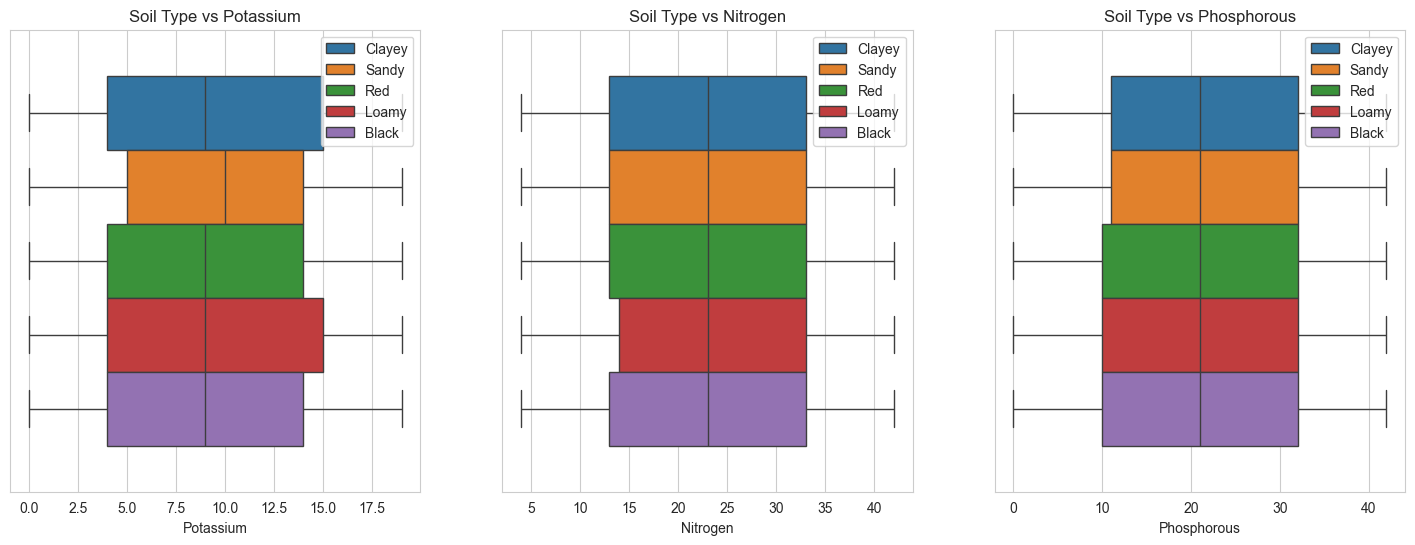

In [12]:
# What is the relationship between the type of soil, and the different minerals?

fig,axs = plt.subplots(ncols=3,nrows=1,figsize=(18,6))
axs[0].set_title("Soil Type vs Potassium")
sns.boxplot(data=df,x='Potassium',hue='Soil Type',ax=axs[0])
axs[1].set_title("Soil Type vs Nitrogen")
sns.boxplot(data=df,x='Nitrogen',hue='Soil Type',ax=axs[1])
axs[2].set_title("Soil Type vs Phosphorous")
sns.boxplot(data=df,x='Phosphorous',hue='Soil Type',ax=axs[2])

axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')
axs[2].legend(loc='upper right')

plt.show()



- Quite uniform however certain types of clay contain higher levels of each mineral

In [13]:
cat_cols

Index(['Soil Type', 'Crop Type', 'Fertilizer Name'], dtype='object')

<Axes: xlabel='Crop Type', ylabel='Soil Type'>

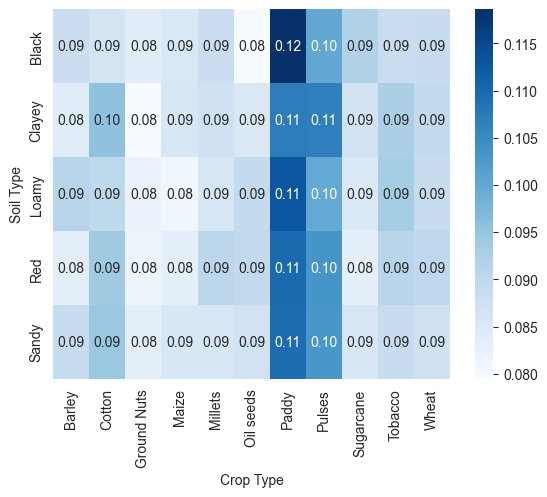

In [14]:
# What is the relationship between clay type and also the crops which tend to be grown?

soil_crop_crosstab = pd.crosstab(df['Soil Type'], df['Crop Type'], normalize='index')
sns.heatmap(soil_crop_crosstab, cmap='Blues', annot=True, fmt='.2f')



In [15]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['Soil Type'], df['Crop Type'])
chi2, p, dof, expected = chi2_contingency(contingency)


print(f"Chi-squared: {chi2:.2f}")
print(f"P-value: {p:.4f}")


import numpy as np

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k)-1)))

cramers_v(contingency)


Chi-squared: 702.58
P-value: 0.0000


0.014375059370788864

- There is a relationship but it is a weak relationship

# Preprocessing
1. One hot encode

In [16]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, average_precision_score, label_ranking_average_precision_score
from sklearn.impute import SimpleImputer
import xgboost as xgb
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score


In [17]:
def preprocessor(df):
    X = df.copy()
    X['temp_humidity'] = X['Temparature']*X['Humidity']
    X['tot_nutrients'] = X['Nitrogen'] + X['Potassium'] + X['Phosphorous']
    X["N_P_ratio"] = X["Nitrogen"] / (X["Phosphorous"] + 1e-5)
    X["N_K_ratio"] = X["Nitrogen"] / (X["Potassium"] + 1e-5)
    X["P_K_ratio"] = X["Phosphorous"] / (X["Potassium"] + 1e-5)
    X = pd.get_dummies(X, columns=['Soil Type', 'Crop Type'])
    X.drop(columns='id',inplace=True)
    
    return X



In [18]:
df_t = preprocessor(df)

In [19]:
df_t.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Fertilizer Name', 'temp_humidity', 'tot_nutrients',
       'N_P_ratio', 'N_K_ratio', 'P_K_ratio', 'Soil Type_Black',
       'Soil Type_Clayey', 'Soil Type_Loamy', 'Soil Type_Red',
       'Soil Type_Sandy', 'Crop Type_Barley', 'Crop Type_Cotton',
       'Crop Type_Ground Nuts', 'Crop Type_Maize', 'Crop Type_Millets',
       'Crop Type_Oil seeds', 'Crop Type_Paddy', 'Crop Type_Pulses',
       'Crop Type_Sugarcane', 'Crop Type_Tobacco', 'Crop Type_Wheat'],
      dtype='object')

In [20]:
X = df_t.drop(columns=['Fertilizer Name'])
y = df_t['Fertilizer Name']

In [21]:
# Label Encode y

encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [23]:
cat_cols_pipeline = cat_cols.drop('Fertilizer Name')

In [24]:
print(cat_cols_pipeline)

Index(['Soil Type', 'Crop Type'], dtype='object')


In [25]:
def pipeline_stack(model):

    preprocessor = ColumnTransformer(transformers=[
        ('cat',OneHotEncoder(handle_unknown='ignore'),cat_cols_pipeline),
        ],
        remainder ='passthrough'
    )

    pipeline = Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('model',model)
    ])

    return pipeline




In [26]:
y_train

array([6, 4, 4, ..., 0, 3, 5])

In [27]:
def map_at_k(y_true, y_pred_proba, k=3):
    num_classes = y_pred_proba.shape[1]
    top_k_pred = np.argsort(y_pred_proba,axis=1)[:,-k:][:,::-1]
    y_true_binary = np.zeros((len(y_true), num_classes), dtype=bool)
    y_true_binary[np.arange(len(y_true)),y_true] = 1

    top_k_binary = np.take_along_axis(y_true_binary, top_k_pred, axis=1)
    top_k_proba = np.take_along_axis(y_pred_proba, top_k_pred, axis=1)
    
    return label_ranking_average_precision_score(top_k_binary, top_k_proba)

In [28]:
from sklearn.preprocessing import label_binarize

def map3(actual, predicted_proba, k=3):
    top_k_preds = np.argsort(predicted_proba, axis=1)[:, ::-1][:, :k]
    score = 0.0
    for i in range(len(actual)):
        if actual[i] in top_k_preds[i]:
            rank = np.where(top_k_preds[i] == actual[i])[0][0]
            score += 1 / (rank + 1)
    return score / len(actual)

In [29]:
cat_cols

Index(['Soil Type', 'Crop Type', 'Fertilizer Name'], dtype='object')

In [30]:
def objective(trial):
    
    cat_feature_indices = [X_train.columns.get_loc(col) for col in cat_cols_pipeline if col in X_train.columns]

    # params = {
    #     'iterations': trial.suggest_int('iterations', 450,650),
    #     'learning_rate': trial.suggest_float('learning_rate', 0.25, 0.4),
    #     'depth': trial.suggest_int('depth', 4, 7),
    #     'l2_leaf_reg': trial.suggest_int('l2_leaf_reg',),  
    #     'verbose': 0,
    #     'random_seed': 42,
    #     'loss_function': 'MultiClass',
    #     'task_type': 'GPU',
    #     'cat_features': cat_feature_indices
    # }

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 450, 650),
        'learning_rate': trial.suggest_float('learning_rate', 0.25, 0.4),
        'max_depth': trial.suggest_int('max_depth', 4, 7),
        'reg_lambda': trial.suggest_float('reg_lambda', 1, 10),  
        'verbosity': 0,
        'random_state': 42,
        'objective': 'multi:softprob',
        'tree_method': 'gpu_hist',
        'early_stopping_rounds':20
    }
    model_xgb = xgb.XGBClassifier(**params)
    # model_cat = CatBoostClassifier(**params)
    # pipeline_study = pipeline_stack(model)  

    cv = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)
    map3_scores = []

    # Use the original X_train/y_train for splitting
    for train_idx, val_idx in cv.split(X, y):
        X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx]
        y_fold_train, y_fold_val = y[train_idx], y[val_idx]

        model_xgb.fit(
            X_fold_train,
            y_fold_train,
            eval_set=[(X_fold_val, y_fold_val)],
            verbose=0
        )

        y_proba = model_xgb.predict_proba(X_fold_val)  
        map3_result = map3(y_fold_val, y_proba, k=3)
        map3_scores.append(map3_result)
    
    trial.set_user_attr("cv_scores", map3_scores)
    return np.mean(map3_scores) 

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=100)

[I 2025-06-09 14:55:32,988] A new study created in memory with name: no-name-a0565bc0-1281-4194-ad02-9ed84f76daca
[I 2025-06-09 14:56:50,247] Trial 0 finished with value: 0.3351458823529009 and parameters: {'n_estimators': 525, 'learning_rate': 0.39260714596148744, 'max_depth': 6, 'reg_lambda': 6.387926357773329}. Best is trial 0 with value: 0.3351458823529009.
[I 2025-06-09 14:58:54,143] Trial 1 finished with value: 0.3338576470587823 and parameters: {'n_estimators': 481, 'learning_rate': 0.2733991780504304, 'max_depth': 4, 'reg_lambda': 8.795585311974417}. Best is trial 0 with value: 0.3351458823529009.
[I 2025-06-09 15:01:23,308] Trial 2 finished with value: 0.33584098039211774 and parameters: {'n_estimators': 570, 'learning_rate': 0.3562108866694068, 'max_depth': 4, 'reg_lambda': 9.72918866945795}. Best is trial 2 with value: 0.33584098039211774.
[I 2025-06-09 15:04:04,564] Trial 3 finished with value: 0.3353737254901572 and parameters: {'n_estimators': 617, 'learning_rate': 0.2818

In [44]:
params = study.best_params
print(params)

{'n_estimators': 561, 'learning_rate': 0.2804165735001245, 'max_depth': 5, 'reg_lambda': 9.004723877706862}


In [32]:
optuna.visualization.plot_param_importances(study)

In [45]:
optuna.visualization.plot_optimization_history(study)

In [34]:
optuna.visualization.plot_parallel_coordinate(study)

In [35]:
model_final = CatBoostClassifier(**params)

model_final.fit(X_train,y_train)

y_preds = model_final.predict_proba(X_test)
results = map3(y_test,y_preds,k=3)
print(results)

0:	learn: 1.9441827	total: 380ms	remaining: 3m 32s
1:	learn: 1.9431090	total: 557ms	remaining: 2m 35s
2:	learn: 1.9422475	total: 753ms	remaining: 2m 20s
3:	learn: 1.9417769	total: 901ms	remaining: 2m 5s
4:	learn: 1.9413161	total: 1.08s	remaining: 2m
5:	learn: 1.9408937	total: 1.24s	remaining: 1m 54s
6:	learn: 1.9406122	total: 1.41s	remaining: 1m 51s
7:	learn: 1.9402217	total: 1.6s	remaining: 1m 50s
8:	learn: 1.9399121	total: 1.79s	remaining: 1m 49s
9:	learn: 1.9396796	total: 1.96s	remaining: 1m 48s
10:	learn: 1.9394912	total: 2.13s	remaining: 1m 46s
11:	learn: 1.9392952	total: 2.33s	remaining: 1m 46s
12:	learn: 1.9390309	total: 2.5s	remaining: 1m 45s
13:	learn: 1.9388111	total: 2.66s	remaining: 1m 43s
14:	learn: 1.9386341	total: 2.83s	remaining: 1m 42s
15:	learn: 1.9383893	total: 3s	remaining: 1m 42s
16:	learn: 1.9381622	total: 3.2s	remaining: 1m 42s
17:	learn: 1.9379482	total: 3.39s	remaining: 1m 42s
18:	learn: 1.9377850	total: 3.56s	remaining: 1m 41s
19:	learn: 1.9376017	total: 3.72s

In [36]:
X_final = preprocessor(df_test)

In [37]:
y_final = model_final.predict_proba(X_final)

In [38]:
top3_pred_indices = np.argsort(y_final, axis=1)[:, -3:][:, ::-1]

In [39]:
pred_labels = np.array([
    encoder.inverse_transform(row) for row in top3_pred_indices
])

In [40]:
pred_labels

array([['DAP', '10-26-26', '20-20'],
       ['17-17-17', '10-26-26', '20-20'],
       ['20-20', '10-26-26', '14-35-14'],
       ...,
       ['14-35-14', 'Urea', '17-17-17'],
       ['10-26-26', 'DAP', '17-17-17'],
       ['17-17-17', '14-35-14', '20-20']], dtype=object)

In [41]:
data_f = pd.DataFrame(pred_labels)

In [42]:
df_final['Fertilizer Name'] = data_f[0] + " " + data_f[1] + " " + data_f[2]

In [43]:
df_final.to_csv("submission.csv",index=False)